In [1]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list
q2_df = pd.read_csv("Car_Crash.csv")

In [4]:
q2_df

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [5]:
q2_df[~q2_df.applymap(np.isreal).all(1)]

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [6]:
q2_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11217.0,5608.000000,3238.213319,0.0,2804.000,5608.000,8412.000,11216.00
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11140.0,1.825583,1.378535,0.0,1.000,2.000,3.000,5.00


In [8]:
q2_df.groupby(["Survived"]).count()

,Unnamed: 0,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
Survived,,,,,,,,,,,,,,,
Not_Survived,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180
survived,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,10037,9960,10037


C:\Users\ANIL FULE\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


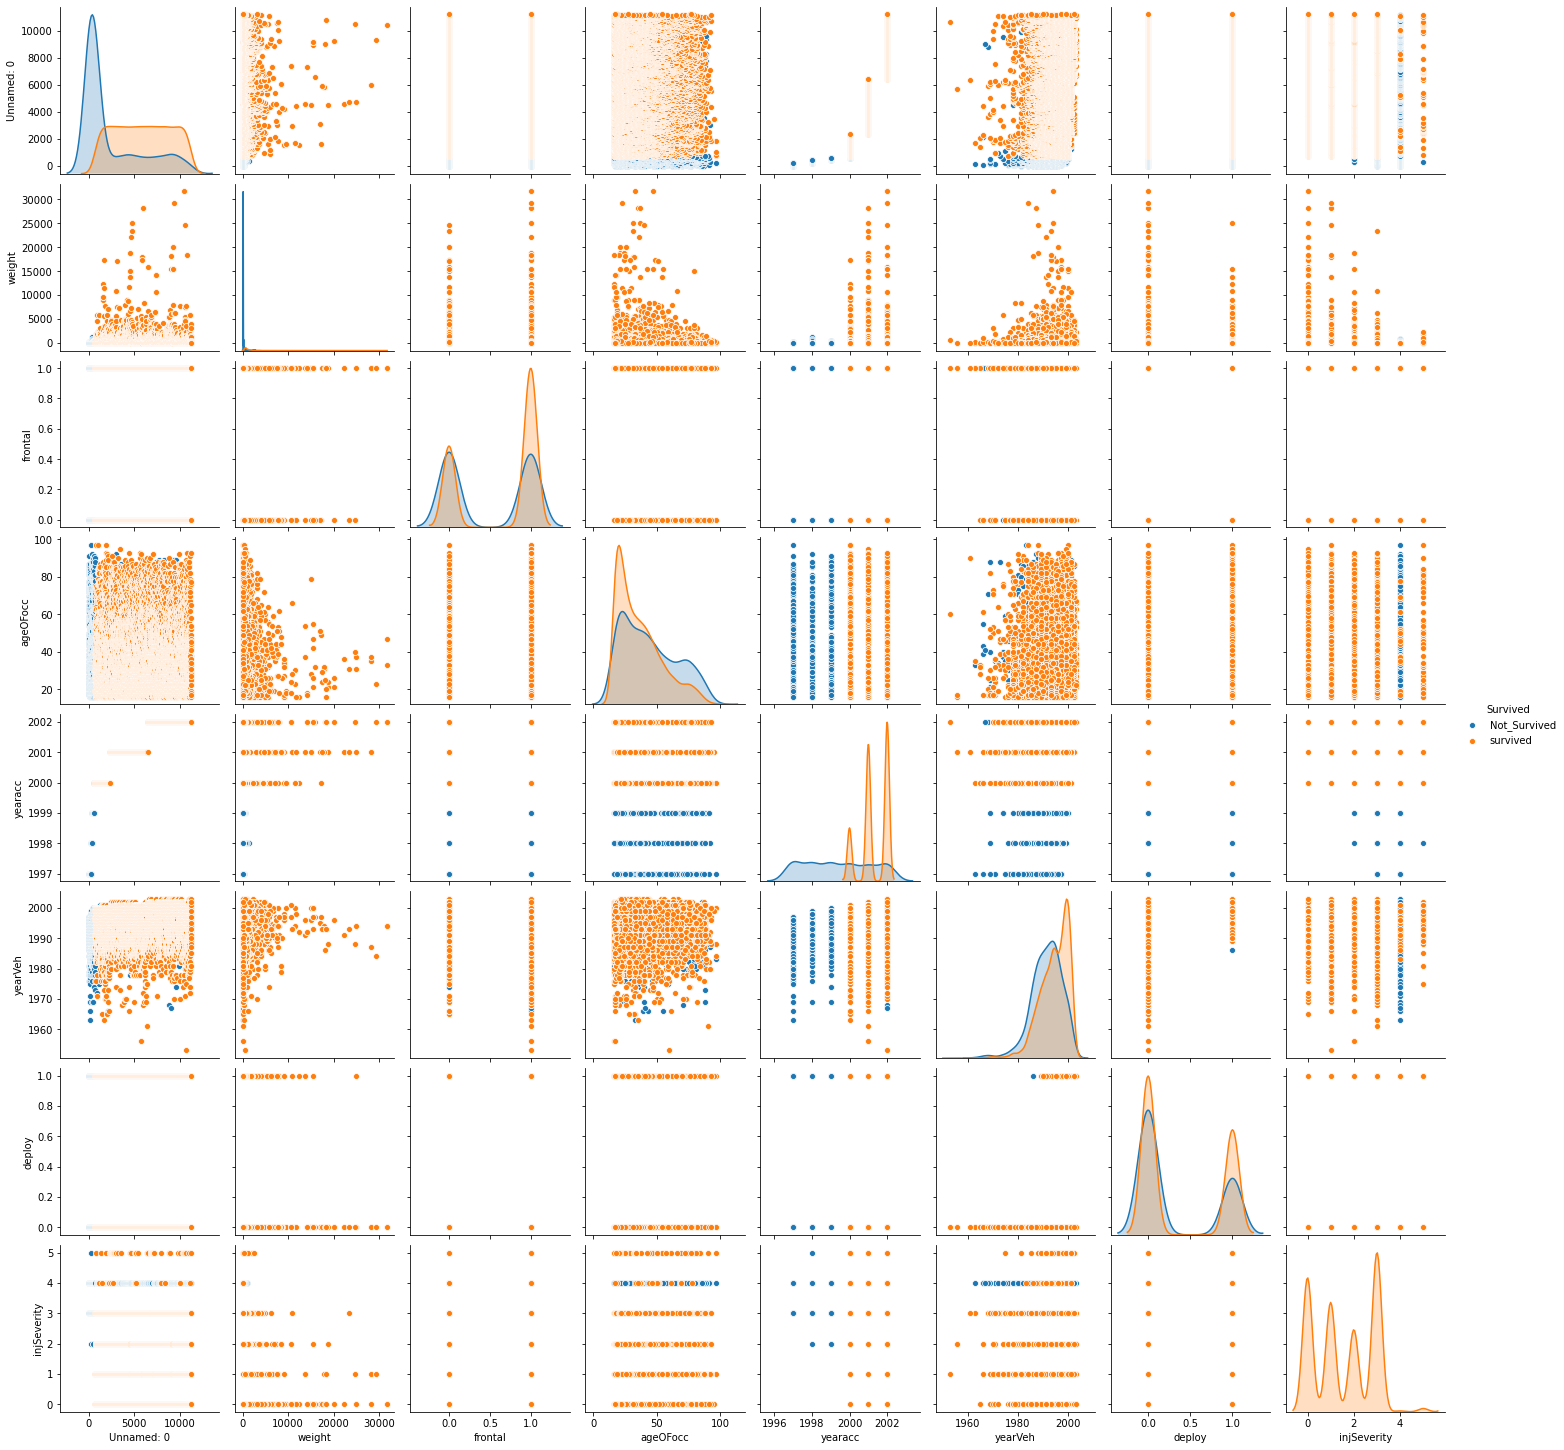

In [9]:
sns.pairplot(q2_df, hue='Survived')

In [15]:
n = q2_df.drop('Unnamed: 0', axis=1)

In [16]:
n.head(5)

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [22]:
array = q2_df.values
X = array[:,0:13]# select all rows and first 8 columns which are the attributes
Y = array[:,14]   #ect all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.03  #aking 70:30 training and test set
seed = 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

ValueError: could not convert string to float: '10-24'

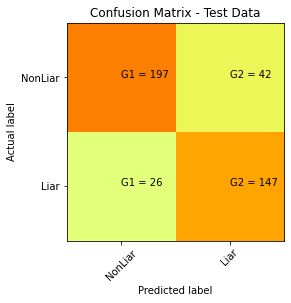

In [88]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NonLiar', 'Liar']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()